# Introduction
Access of potable water i.e. the water that isn't harmful for our health is basic human right. However, the availablity of potable water is still a topic of discussion in every corner of the world. In this project I'm trying to figure out what are the factors that majorly affect the potability of water and at the end I'll a write a machine learning algorithm which will predict whether the water is safe for drinking or not. <br>

Instructions to be followed: <br>
1. Use DecisionTreeClassifier() only.
2. Plot a decision tree at the end.

# Importing libraries

In [1]:
#Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

#Important functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Model
from sklearn.tree import DecisionTreeClassifier

# Data Source
https://www.kaggle.com/datasets/adityakadiwal/water-potability

# Loading the data

In [2]:
train_df=pd.read_csv('water_potability.csv')
train_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Column Description
1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# Exploratory Data Analysis

In [3]:
train_df.shape #(Rows,Columns)

(3276, 10)

In [4]:
train_df.info() #all features, total number of tuples and data type of `train` data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
#Statistical Information
train_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Data Visualization

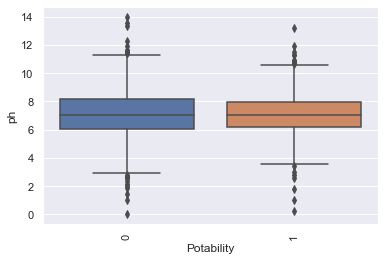

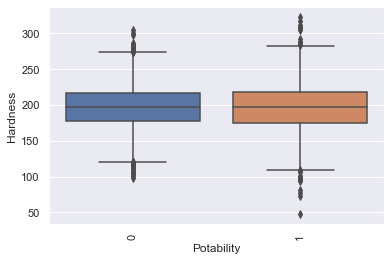

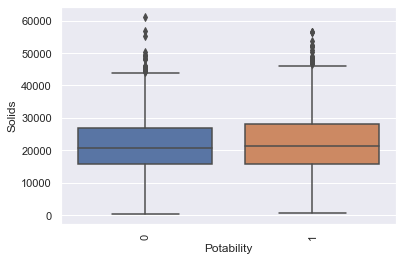

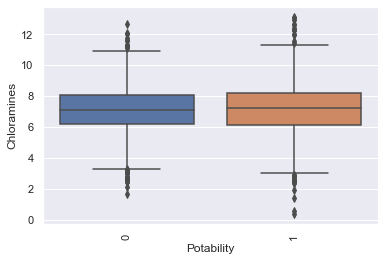

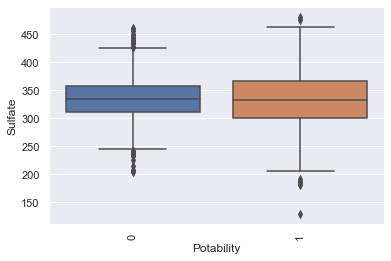

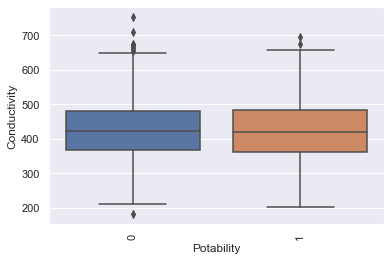

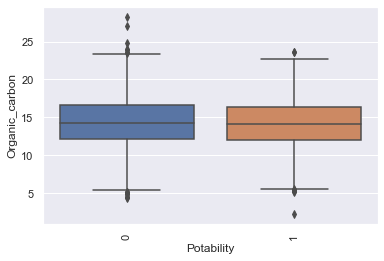

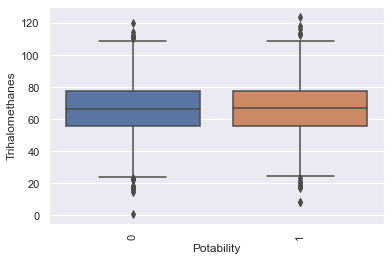

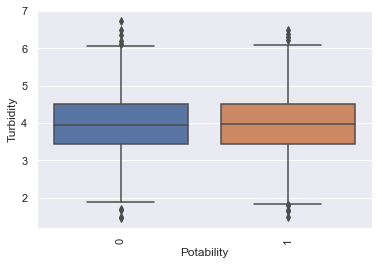

In [6]:
#Now we will try to find the relationship of numerical attributes with potability
def plt_potability(param):
    sns.boxplot(y=train_df[param],x=train_df.Potability)
    plt.xticks(rotation=90);
    plt.show()
attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
for attribute in attributes:
    plt_potability(attribute)

<AxesSubplot:>

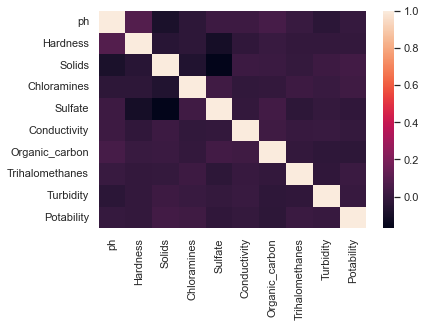

In [7]:
sns.heatmap(train_df.corr())

# Observations
1. From the first plot we can see that, the individual relationship of independent variable with dependent variable is of least significance.
2. From the second plot of correlation it is clear that there is no significant correlation between variables.
3. There doesn't exist a single significant variable therefore we have to consider effect of all the variables simultaneously.

# Missing Values

**Getting the missing values :** We will find out all the missing values from the dataset using `insa()`.

In [8]:
#Missing values from the train data
train_df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**Filling the missing values:** We will fill the missing values using the available stastical information about the dataset.

In [9]:
cond=train_df['Potability']==0

train_df['ph'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['ph'].median(),
                                False:train_df.loc[train_df['Potability']==1]['ph'].median()
                                }),inplace=True)

train_df['Sulfate'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['Sulfate'].median(),
                                False:train_df.loc[train_df['Potability']==1]['Sulfate'].median()
                                }),inplace=True)

train_df['Trihalomethanes'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['Trihalomethanes'].median(),
                                False:train_df.loc[train_df['Potability']==1]['Trihalomethanes'].median()
                                }),inplace=True)

In [10]:
train_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Modeling

In [11]:
#Seperating Response Variable from the dataset
X=train_df.drop('Potability',axis=1)
y=train_df['Potability']

In [12]:
X.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [13]:
#train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [14]:
attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf=clf.fit(X_train, y_train)
Y_pred=clf.predict(X_test)
pred=clf.predict(X_train)   
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_test.values,Y_pred))

1.0
0.7362637362637363


In [22]:
print(X_train.columns)
print('------------------------------')
print(X_test)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')
------------------------------
            ph    Hardness        Solids  Chloramines     Sulfate  \
136   6.063355  160.767311  14775.145596     7.484104  305.828553   
600   7.035456  233.020134  27071.118618     6.220936  298.112645   
1784  9.252857  168.040751  50279.262429     5.905056  415.450810   
3061  3.989032  216.076138  40175.206091     7.487423  309.800796   
2779  9.454119  224.817132  21379.963927     5.407692  227.665635   
...        ...         ...           ...          ...         ...   
2611  5.517737  190.669928  17638.322473    10.525858  333.389426   
275   5.324942  280.089655  35344.658047    13.043806  180.206746   
898   6.784279  140.366709  17569.579819     4.084932  333.389426   
2298  5.651934  139.049917  16575.821260     7.857856  390.537656   
968   7.856471  204.783428   5619.135558     5.816703

In [46]:
row_1 = X_test.iloc[53]
row_1

ph                     9.519660
Hardness             204.080945
Solids             17258.188355
Chloramines            6.154073
Sulfate              310.716294
Conductivity         395.698538
Organic_carbon        17.061389
Trihalomethanes       44.273379
Turbidity              3.994556
Name: 933, dtype: float64

In [47]:
input_data = np.array(row_1).reshape(1, -1)

new_pred = clf.predict(input_data)
new_pred

array([0], dtype=int64)

In [41]:
predictor = pickle.load(open("DT_Model.pkl", 'rb'))
prediction = predictor.predict(input_data)
prediction

array([1], dtype=int64)

In [42]:
listToStr = ' '.join([str(element) for element in prediction]) 

listToStr

'1'

In [43]:
if listToStr == '0':
    print('The water is not safe to drink')
else:
    print('The water is safe to drink')

The water is safe to drink


In [30]:
for i in X_train.columns:
    print(f'({i}){X_train[i].min(), X_train[i].max()}')

(ph)(0.0, 13.999999999999998)
(Hardness)(47.432, 323.124)
(Solids)(320.942611274359, 61227.19600771213)
(Chloramines)(0.3520000000000003, 12.912186637308174)
(Sulfate)(187.1707143624393, 476.5397173325516)
(Conductivity)(201.6197367551575, 753.3426195583046)
(Organic_carbon)(2.1999999999999886, 28.30000000000001)
(Trihalomethanes)(0.7379999999999995, 124.0)
(Turbidity)(1.45, 6.739)


#### Exporting the Model


In [19]:
import pickle

with open('DT_Model.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Confusion Matrix

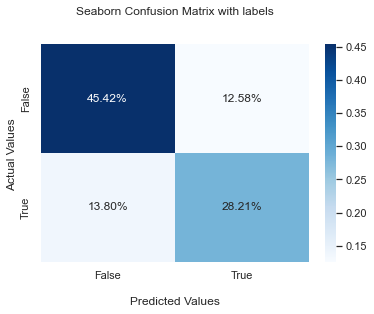

In [16]:
cf_matrix=confusion_matrix(y_test,Y_pred)
labels=['True Negative','False Positive','False Negative','True Positive']
labels=np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# Conclusion
1) This model classifies the data with fair accuracy. <br>
2) All the attributes play equally significant role in classification.

# Decision Tree

In [17]:
from sklearn import tree
plt.figure(figsize=(20,20),dpi=500)
tree.plot_tree(clf,feature_names=attributes, class_names=None,filled=True,rounded=True)
plt.show();

The End